In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import matplotlib.gridspec as gridspec

In [7]:
# Install the imbalanced-learn package
%pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:

from imblearn.over_sampling import SMOTE

<H1>Data Overview</H1>

In [9]:
application_record_path = 'application_record.csv'
credit_record_path = 'credit_record.csv'
application_record = pd.read_csv(application_record_path)
credit_record = pd.read_csv(credit_record_path)

application_record_info = application_record.info(), application_record.head()
credit_record_info = credit_record.info(), credit_record.head()
application_record.head(), credit_record.head()
application_record_info, credit_record_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

((None,
          ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
  0  5008804           M            Y               Y             0   
  1  5008805           M            Y               Y             0   
  2  5008806           M            Y               Y             0   
  3  5008808           F            N               Y             0   
  4  5008809           F            N               Y             0   
  
     AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
  0          427500.0               Working               Higher education   
  1          427500.0               Working               Higher education   
  2          112500.0               Working  Secondary / secondary special   
  3          270000.0  Commercial associate  Secondary / secondary special   
  4          270000.0  Commercial associate  Secondary / secondary special   
  
       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
  0        Civil 

<H1>Data Cleaning</H1>
<H2>Treating Null values</H2>

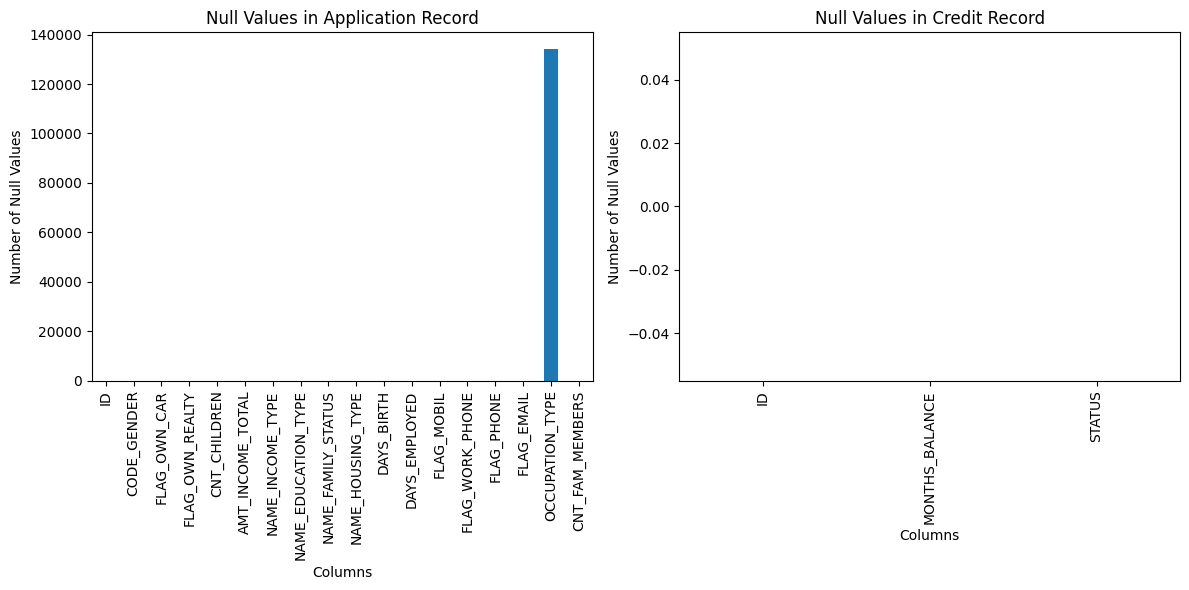

In [10]:
# Check for null values
application_nulls = application_record.isnull().sum()

credit_nulls = credit_record.isnull().sum()

# Plot 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
application_nulls.plot(kind='bar')
plt.title('Null Values in Application Record')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')

plt.subplot(1, 2, 2)
credit_nulls.plot(kind='bar')
plt.title('Null Values in Credit Record')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')

plt.tight_layout()
plt.show()

In [11]:


# Verify that there are no more null values
application_nulls = application_record.isnull().sum()
credit_nulls = credit_record.isnull().sum()

application_nulls, credit_nulls

(ID                          0
 CODE_GENDER                 0
 FLAG_OWN_CAR                0
 FLAG_OWN_REALTY             0
 CNT_CHILDREN                0
 AMT_INCOME_TOTAL            0
 NAME_INCOME_TYPE            0
 NAME_EDUCATION_TYPE         0
 NAME_FAMILY_STATUS          0
 NAME_HOUSING_TYPE           0
 DAYS_BIRTH                  0
 DAYS_EMPLOYED               0
 FLAG_MOBIL                  0
 FLAG_WORK_PHONE             0
 FLAG_PHONE                  0
 FLAG_EMAIL                  0
 OCCUPATION_TYPE        134203
 CNT_FAM_MEMBERS             0
 dtype: int64,
 ID                0
 MONTHS_BALANCE    0
 STATUS            0
 dtype: int64)

In [12]:

#drop the occupation_type column
application_record = application_record.drop(['OCCUPATION_TYPE'], axis=1)

In [13]:
application_nulls = application_record.isnull().sum()
credit_nulls = credit_record.isnull().sum()
application_nulls, credit_nulls

(ID                     0
 CODE_GENDER            0
 FLAG_OWN_CAR           0
 FLAG_OWN_REALTY        0
 CNT_CHILDREN           0
 AMT_INCOME_TOTAL       0
 NAME_INCOME_TYPE       0
 NAME_EDUCATION_TYPE    0
 NAME_FAMILY_STATUS     0
 NAME_HOUSING_TYPE      0
 DAYS_BIRTH             0
 DAYS_EMPLOYED          0
 FLAG_MOBIL             0
 FLAG_WORK_PHONE        0
 FLAG_PHONE             0
 FLAG_EMAIL             0
 CNT_FAM_MEMBERS        0
 dtype: int64,
 ID                0
 MONTHS_BALANCE    0
 STATUS            0
 dtype: int64)

Encode categorical variables.

In [14]:
#Encode categorical variables.  Using Table 2, create a label for each client — {Good, Bad} — based on their loan payment records. You may choose any reasonable criteria to formulate this label.Data Integration: Add this label as a new column in Table 1.Data Preprocessing:


In [15]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


<H1> Data Preprocessing </H1>

In [ ]:
# ##Clean application_record.csv
# # Handle missing values (e.g., 'OCCUPATION_TYPE' has NaN values)
# application_record['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

# Drop duplicates
application_record.drop_duplicates(subset='ID', inplace=True)
#remove status X
credit_record = credit_record[credit_record['STATUS'] != 'X']

# Step 2: Create Good/Bad labels from credit_record.csv
def determine_label(group):
    if any(group['STATUS'].isin(['1', '2', '3', '4', '5'])):
        return 'Bad'
    return 'Good'

# Group by 'ID' and apply the function
credit_record['STATUS'] = credit_record['STATUS'].astype(str)
labels = credit_record.groupby('ID').apply(determine_label).reset_index(name='label')

# Merge datasets
merged_data = application_record.merge(labels, on='ID', how='inner')

# Preprocess data
# Encode categorical variables using one-hot encoding for some columns and Label Encoding for others
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
merged_data = pd.get_dummies(merged_data, columns=categorical_cols, drop_first=True)

# Drop non-essential columns (like 'ID' or irrelevant identifiers)
merged_data.drop(columns=['ID'], inplace=True)

# Separate features and labels
X = merged_data.drop(columns=['label'])
y = merged_data['label']

#balance the data
X_balanced, Y_balanced = SMOTE().fit_resample(X, y)
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 0 = Good, 1 = Bad

# Standardize numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Confirm preprocessing success
X.head(), y[:5]


(   CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
 0      -0.57672          2.382613    0.949906      -0.466760         0.0   
 1      -0.57672          2.382613    0.949906      -0.466760         0.0   
 2      -0.57672         -0.723563   -1.297488      -0.442126         0.0   
 3      -0.57672          0.829525   -0.736411      -0.455982         0.0   
 4      -0.57672          0.829525   -0.736411      -0.455982         0.0   
 
    FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  CODE_GENDER_M  \
 0         1.861201   -0.642858   -0.315244        -0.213656              1   
 1         1.861201   -0.642858   -0.315244        -0.213656              1   
 2        -0.537287   -0.642858   -0.315244        -0.213656              1   
 3        -0.537287    1.555554    3.172141        -1.311276              0   
 4        -0.537287    1.555554    3.172141        -1.311276              0   
 
    ...  NAME_EDUCATION_TYPE_Secondary / secondary special  

In [24]:
#print the number of good and bad labels
print(merged_data['label'].value_counts())
#print after balancing the data
print(pd.Series(Y_balanced).value_counts())

    

Good    28819
Bad      4291
Name: label, dtype: int64
Bad     28819
Good    28819
Name: label, dtype: int64


In [21]:


#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.3, random_state=42, stratify=Y_balanced)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(C=1.0, kernel='rbf', gamma='auto'),
    "Random Forest": RandomForestClassifier()
}

# Step 3: Train and evaluate models
classification_reports = []
confusion_matrices = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classification_reports.append(report)
    confusion_matrices.append(cm)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
              precision    recall  f1-score   support

         Bad       0.69      0.63      0.66      8646
        Good       0.66      0.72      0.69      8646

    accuracy                           0.67     17292
   macro avg       0.68      0.67      0.67     17292
weighted avg       0.68      0.67      0.67     17292

[[5439 3207]
 [2420 6226]]


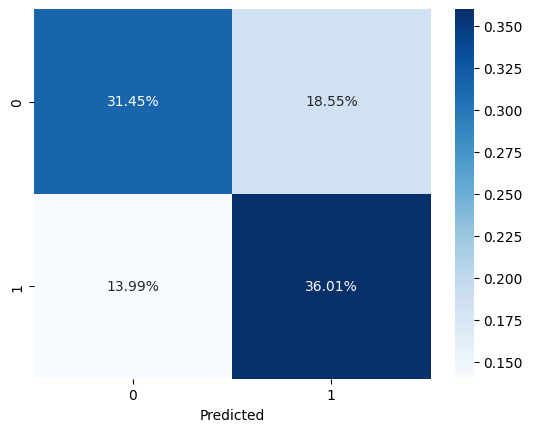

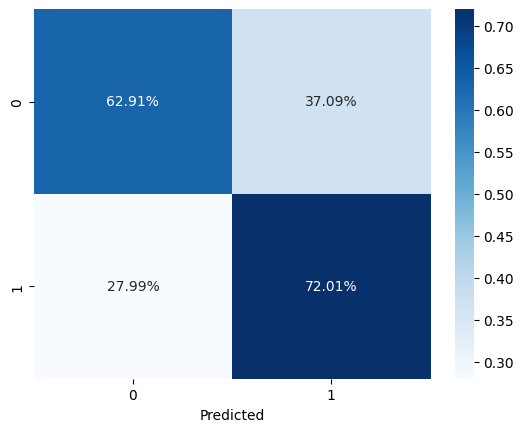

SVM
              precision    recall  f1-score   support

         Bad       0.81      0.94      0.87      8646
        Good       0.92      0.78      0.85      8646

    accuracy                           0.86     17292
   macro avg       0.87      0.86      0.86     17292
weighted avg       0.87      0.86      0.86     17292

[[8094  552]
 [1863 6783]]


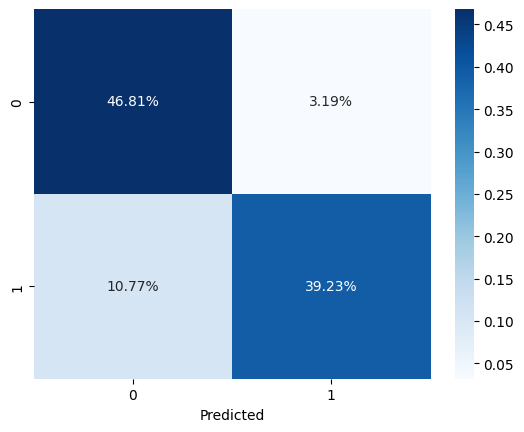

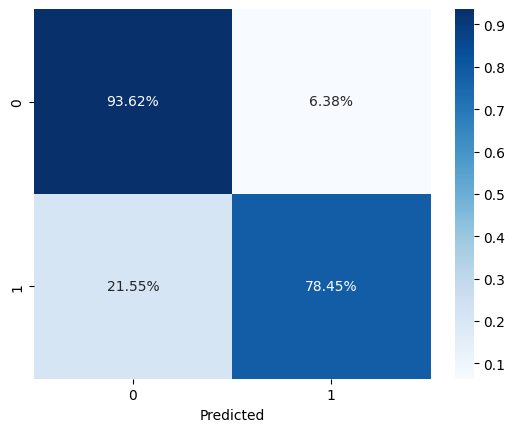

Random Forest
              precision    recall  f1-score   support

         Bad       0.91      0.91      0.91      8646
        Good       0.91      0.91      0.91      8646

    accuracy                           0.91     17292
   macro avg       0.91      0.91      0.91     17292
weighted avg       0.91      0.91      0.91     17292

[[7900  746]
 [ 759 7887]]


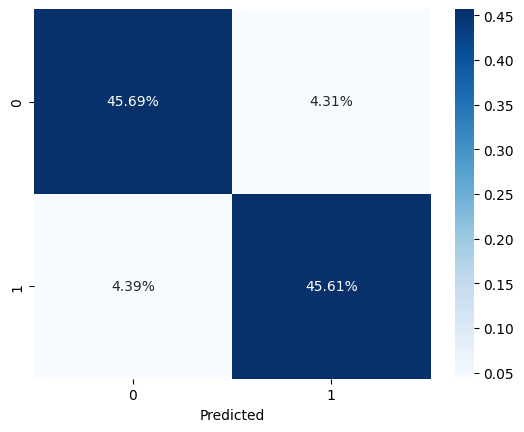

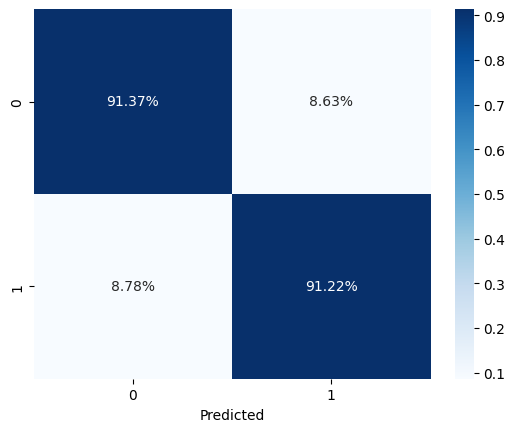

In [25]:
for i in range(len(models)):
    print(list(models.keys())[i])
    print(classification_reports[i])
    print(confusion_matrices[i])
    #plot the normalized confusion matrix
    plt.figure()
    sns.heatmap(confusion_matrices[i]/np.sum(confusion_matrices[i]), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.show()
    #normalize the confusion matrix
    confusion_matrices[i] = confusion_matrices[i].astype('float') / confusion_matrices[i].sum(axis=1)[:, np.newaxis]
    #plot the normalized confusion matrix
    plt.figure()
    sns.heatmap(confusion_matrices[i], annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.show()
    



### Why Use the Random Forest Algorithm?

1. **Robustness to Overfitting**: Random Forest reduces the risk of overfitting by averaging multiple decision trees, which makes it more robust compared to a single decision tree.

2. **Handling Missing Values**: Random Forest can handle missing values effectively, making it suitable for real-world datasets where missing data is common.

3. **Feature Importance**: It provides insights into feature importance, helping to identify the most significant variables in the dataset.

4. **Versatility**: Random Forest can be used for both classification and regression tasks, making it a versatile algorithm.

5. **High Accuracy**: It generally provides high accuracy due to the ensemble nature of combining multiple trees.

6. **Scalability**: Random Forest is scalable to large datasets and can be parallelized, making it efficient for big data applications.

7. **Handling Imbalanced Data**: It can handle imbalanced datasets well by adjusting class weights or using techniques like SMOTE for balancing.

8. **Non-Parametric**: It does not assume any specific distribution of the data, making it flexible for various types of data.

<H1>Hyperparameter Tuning</H1>

In [26]:
#Hyperparamter tuning for Random Forest and grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.9s
[CV] END max_depth=5, min_samples_leaf=1, m

In [29]:
#test the model with the best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         Bad       0.90      0.85      0.87      8646
        Good       0.86      0.90      0.88      8646

    accuracy                           0.88     17292
   macro avg       0.88      0.88      0.88     17292
weighted avg       0.88      0.88      0.88     17292

[[7371 1275]
 [ 846 7800]]
